In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv', na_values=['?'])
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [4]:
df[~(df.fillna(value=-1).astype(int) == df.fillna(value=-1))].dropna(how='all').dropna(axis=1, how='all')

,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years)
6,NaN,3.40,NaN,NaN
9,1.266973,2.80,NaN,NaN
16,NaN,NaN,0.25,NaN
22,NaN,NaN,0.25,NaN
28,NaN,0.04,NaN,NaN
...,...,...,...,...
848,NaN,NaN,0.50,NaN
849,NaN,0.16,NaN,NaN
855,NaN,NaN,0.08,NaN
856,NaN,NaN,0.08,NaN


In [5]:
df['Hinselmann'].value_counts()

0    823
1     35
Name: Hinselmann, dtype: int64

In [6]:
df['Schiller'].value_counts()

0    784
1     74
Name: Schiller, dtype: int64

In [7]:
df['Citology'].value_counts()

0    814
1     44
Name: Citology, dtype: int64

In [8]:
df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [9]:
def na_percentage(data):
    return data.isna().mean().round(4) * 100

na_percentage(df)

Age                                    0.00
Number of sexual partners              3.03
First sexual intercourse               0.82
Num of pregnancies                     6.53
Smokes                                 1.52
Smokes (years)                         1.52
Smokes (packs/year)                    1.52
Hormonal Contraceptives               12.59
Hormonal Contraceptives (years)       12.59
IUD                                   13.64
IUD (years)                           13.64
STDs                                  12.24
STDs (number)                         12.24
STDs:condylomatosis                   12.24
STDs:cervical condylomatosis          12.24
STDs:vaginal condylomatosis           12.24
STDs:vulvo-perineal condylomatosis    12.24
STDs:syphilis                         12.24
STDs:pelvic inflammatory disease      12.24
STDs:genital herpes                   12.24
STDs:molluscum contagiosum            12.24
STDs:AIDS                             12.24
STDs:HIV                        

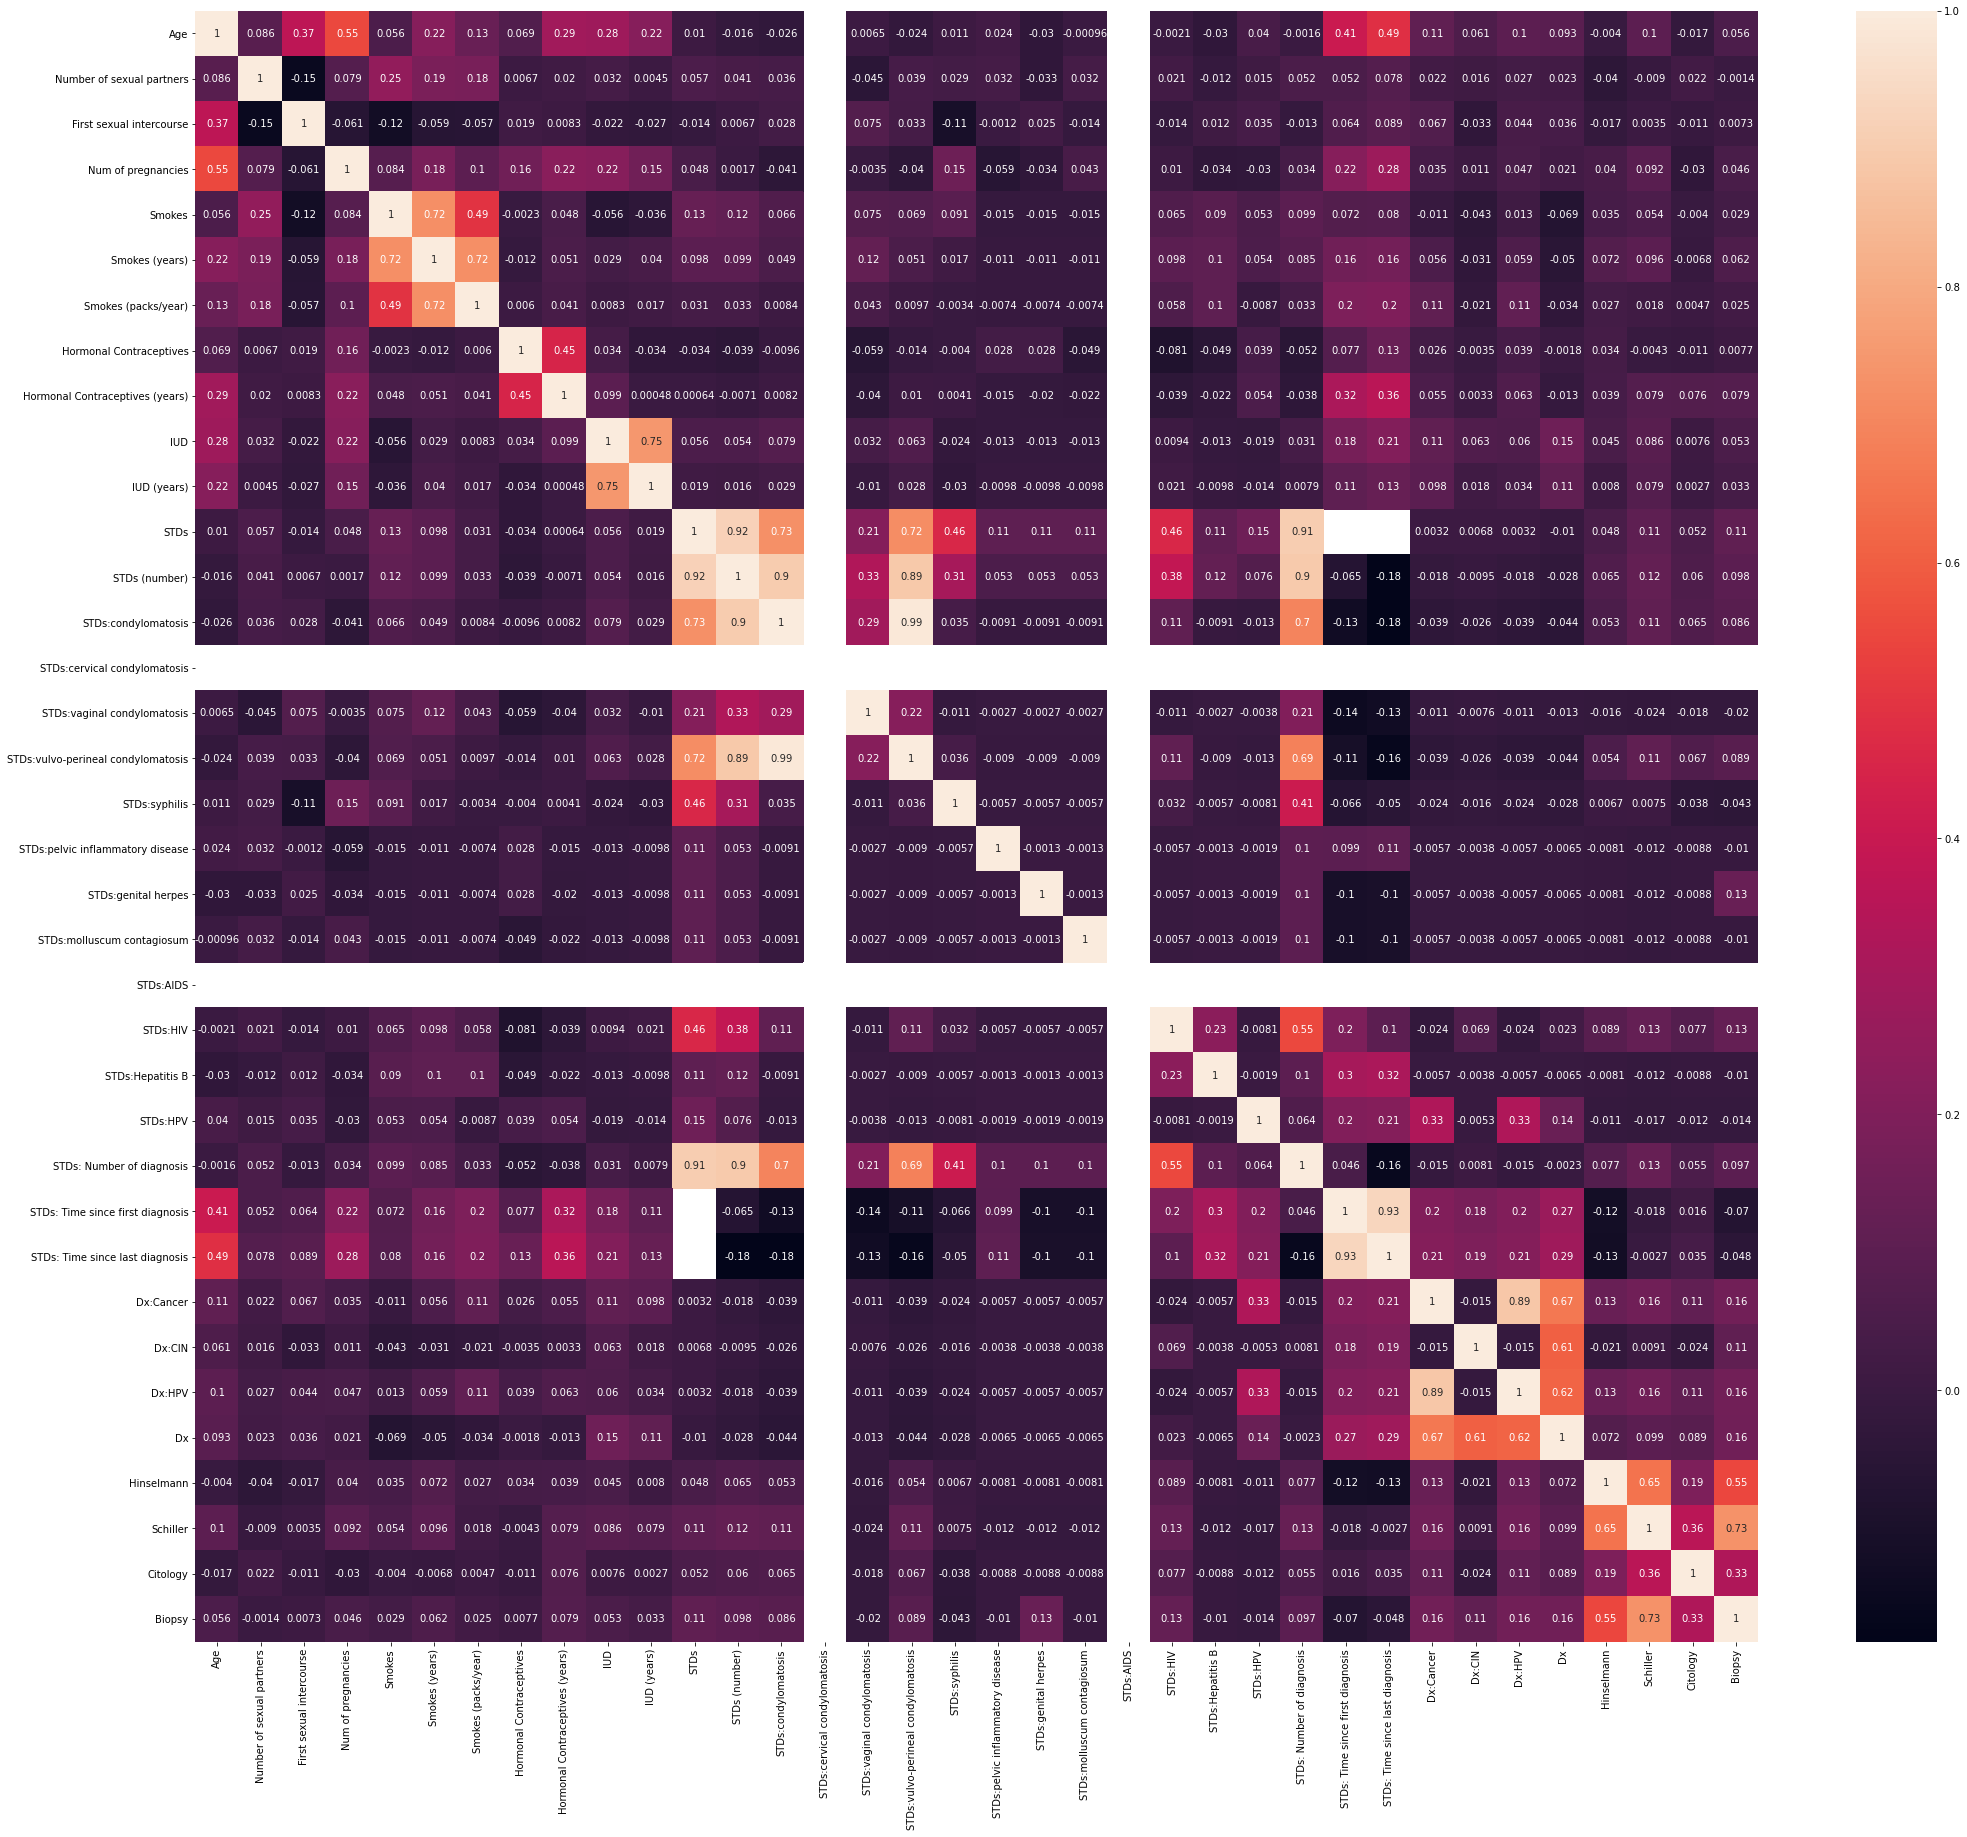

In [10]:
plt.figure(figsize=(35,30), facecolor='white')
sns.heatmap(df.corr(), annot=True)

In [11]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
predicted = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
df.groupby(predicted).count()[['Age']].rename(columns={"Age": "Count"}).unstack(level=[1,2])

Count                  
Schiller               0           1      
Citology               0     1     0     1
Hinselmann Biopsy                         
0          0       756.0  20.0  14.0   3.0
           1         6.0   1.0  12.0  11.0
1          0         1.0   NaN   6.0   3.0
           1         NaN   NaN  19.0   6.0

In [13]:
df.loc[:, (df.nunique() <= 2)]


,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
854,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
855,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,1,0
856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.impute import SimpleImputer, KNNImputer

def fill_missing_values(strategy, data):
    data.fillna(np.nan, inplace=True)
    filled = data
    if strategy in ['mean', 'median', 'most_frequent']:
        imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)    
    elif strategy == 'knn':
        imputer = KNNImputer()
    else: 
        return data
        
    filled = pd.DataFrame(imputer.fit_transform(data), index=data.index, columns=data.columns)

    return filled

df_filled = fill_missing_values('knn', df)

sum(list(na_percentage(df_filled)))

0.0

In [15]:
df_filled.nunique()

Age                                    44
Number of sexual partners              22
First sexual intercourse               25
Num of pregnancies                     24
Smokes                                  3
Smokes (years)                         35
Smokes (packs/year)                    66
Hormonal Contraceptives                 6
Hormonal Contraceptives (years)       118
IUD                                     5
IUD (years)                            45
STDs                                    4
STDs (number)                           8
STDs:condylomatosis                     4
STDs:cervical condylomatosis            1
STDs:vaginal condylomatosis             2
STDs:vulvo-perineal condylomatosis      4
STDs:syphilis                           4
STDs:pelvic inflammatory disease        2
STDs:genital herpes                     2
STDs:molluscum contagiosum              3
STDs:AIDS                               1
STDs:HIV                                3
STDs:Hepatitis B                  

In [16]:
df_filled['STDs (number)'].unique()


array([0. , 2. , 1. , 0.2, 0.8, 3. , 0.4, 4. ])

In [17]:
df_filled.loc[:, (df.nunique() <= 2)] = df_filled.loc[:, (df.nunique() <= 2)].apply(round)
df_filled.nunique()

Age                                    44
Number of sexual partners              22
First sexual intercourse               25
Num of pregnancies                     24
Smokes                                  2
Smokes (years)                         35
Smokes (packs/year)                    66
Hormonal Contraceptives                 2
Hormonal Contraceptives (years)       118
IUD                                     2
IUD (years)                            45
STDs                                    2
STDs (number)                           8
STDs:condylomatosis                     2
STDs:cervical condylomatosis            1
STDs:vaginal condylomatosis             2
STDs:vulvo-perineal condylomatosis      2
STDs:syphilis                           2
STDs:pelvic inflammatory disease        2
STDs:genital herpes                     2
STDs:molluscum contagiosum              2
STDs:AIDS                               1
STDs:HIV                                2
STDs:Hepatitis B                  

In [18]:
# noinspection PyPep8Naming
def create_x_y(data):
    data_X = data.drop(predicted, axis='columns')

    data_y = data[predicted].copy()

    data_y["label"] = data.apply(lambda row: f"{int(row['Hinselmann'])}{int(row['Schiller'])}{int(row['Citology'])}{int(row['Biopsy'])}", axis=1)
    print(data_y["label"].unique())
    return data_X, data_y

# Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix

X, y = create_x_y(df_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y['label'])

['0000' '1101' '0111' '0100' '0101' '1100' '1110' '1111' '0010' '0001'
 '0110' '1000' '0011']


In [20]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores = pd.DataFrame(cross_validate(model, X, y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=10))
scores.append(scores.mean().rename('Mean'))

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packa

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.006032,0.013966,0.604651,0.085526,0.077037
1,0.006000,0.002001,0.767442,0.108553,0.097778
2,0.005999,0.002002,0.732558,0.092105,0.094595
3,0.004998,0.002002,0.825581,0.157895,0.127566
4,0.005000,0.002000,0.767442,0.260234,0.179338
5,0.005999,0.002001,0.790698,0.153509,0.172676
6,0.005999,0.002002,0.744186,0.094815,0.094815
7,0.006998,0.002001,0.744186,0.204444,0.185135
8,0.006000,0.002000,0.717647,0.101667,0.085315
9,0.004990,0.002964,0.752941,0.106667,0.096750


In [21]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[173,   0,   4,   1,   1,   5,   1,   3,   0,   1,   4,   1],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [22]:
pd.Series(y_pred).value_counts()

0000    191
0101      6
1101      5
0010      4
0111      3
1111      2
0011      1
0110      1
0100      1
1100      1
dtype: int64

# Decision tree - features reduced

In [23]:
def remove_correlating(data, corr_threshold=0.7):
    corr = data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= corr_threshold:
                if columns[j]:
                    columns[j] = False

    # columns[-1] = False
    selected_columns = data.columns[columns]
    print(f"Removing {len(data.columns[~columns])} attributes: {data.columns[~columns]}")
    return data[selected_columns], selected_columns

In [24]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
transformed_x = selector.fit_transform(X_train, y_train)
model.fit(transformed_x, y_train)
scores = pd.DataFrame(cross_validate(model, selector.transform(X), y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=10))
scores.append(scores.mean().rename('Mean'))

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packa

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.004999,0.002002,0.616279,0.087171,0.077941
1,0.004998,0.001001,0.767442,0.169408,0.125375
2,0.005000,0.001002,0.755814,0.204678,0.170824
3,0.004994,0.001002,0.790698,0.099415,0.080808
4,0.004000,0.002001,0.767442,0.260234,0.179338
5,0.004999,0.002002,0.779070,0.152047,0.171852
6,0.003998,0.002002,0.744186,0.094815,0.085333
7,0.005998,0.002002,0.662791,0.084444,0.074026
8,0.004998,0.002002,0.670588,0.095000,0.067857
9,0.005001,0.001999,0.741176,0.105000,0.095238


In [25]:
X.loc[:, ~selector.get_support()]

,STDs:cervical condylomatosis,STDs:molluscum contagiosum,STDs:AIDS
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
853,0.0,0.0,0.0
854,0.0,0.0,0.0
855,0.0,0.0,0.0
856,0.0,0.0,0.0


Removing 11 attributes: Index(['Smokes (years)', 'Smokes (packs/year)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:HPV', 'Dx'],
      dtype='object')


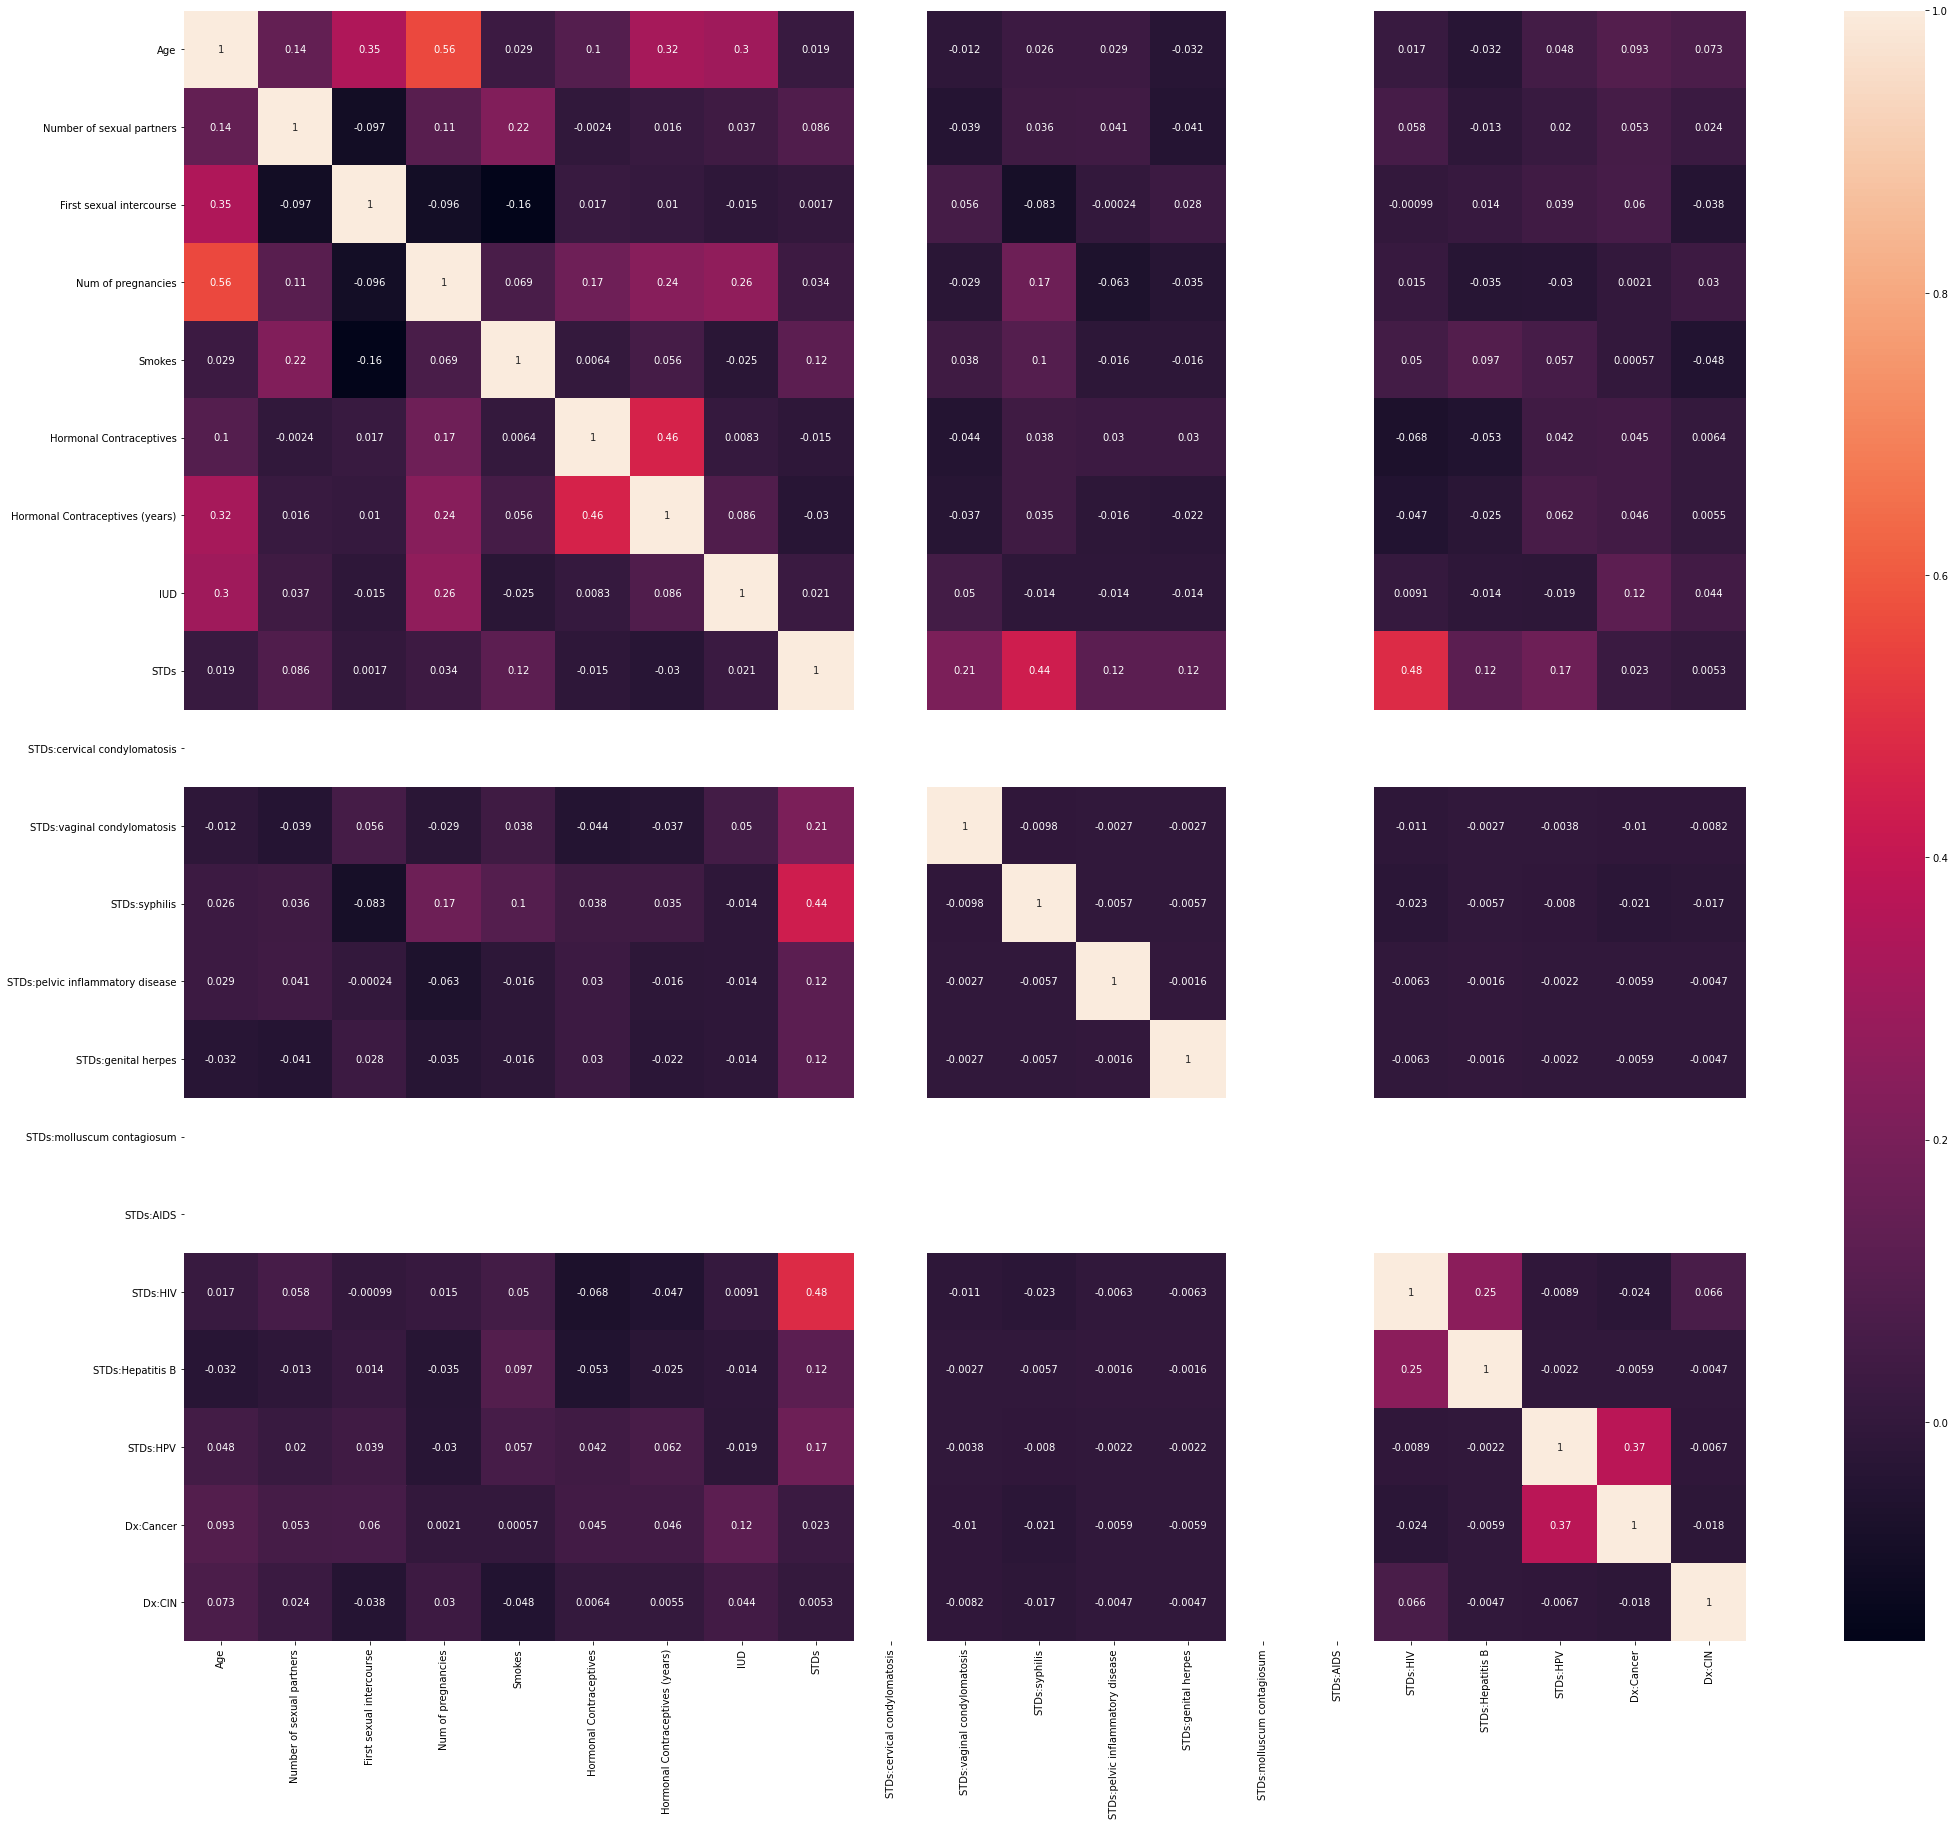

In [26]:
transformed_x, selected_cols = remove_correlating(X_train, corr_threshold=0.6)
plt.figure(figsize=(35,30), facecolor='white')
sns.heatmap(transformed_x.corr(), annot=True)

In [27]:
model.fit(transformed_x, y_train)
scores = pd.DataFrame(cross_validate(model, X[selected_cols], y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=10))
scores.append(scores.mean().rename('Mean'))

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packa

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.004013,0.002031,0.581395,0.082237,0.074074
1,0.004999,0.002002,0.860465,0.245066,0.241987
2,0.002999,0.003000,0.732558,0.092105,0.085135
3,0.004002,0.002001,0.813953,0.156433,0.140196
4,0.003995,0.002002,0.790698,0.263158,0.228591
5,0.003999,0.002001,0.755814,0.149123,0.120408
6,0.004033,0.002969,0.813953,0.157778,0.108991
7,0.004030,0.001970,0.662791,0.084444,0.066901
8,0.004997,0.002001,0.705882,0.100000,0.084507
9,0.003999,0.002001,0.776471,0.110000,0.098434


In [28]:
model.fit(selector.fit_transform(transformed_x), y_train)
scores = pd.DataFrame(cross_validate(model, selector.transform(X[selected_cols]), y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=10))
scores.append(scores.mean().rename('Mean'))

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
c:\users\andre\appdata\local\programs\python\python38\lib\site-packa

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.004001,0.002000,0.593023,0.144737,0.096296
1,0.004000,0.001999,0.872093,0.123355,0.117925
2,0.003000,0.003002,0.755814,0.095029,0.086667
3,0.002980,0.002002,0.813953,0.210526,0.189474
4,0.002999,0.002001,0.779070,0.261696,0.207125
5,0.003000,0.003006,0.790698,0.153509,0.129333
6,0.002994,0.002000,0.802326,0.156296,0.107895
7,0.005005,0.004000,0.720930,0.091852,0.076685
8,0.005996,0.002999,0.694118,0.159167,0.129763
9,0.002997,0.002002,0.752941,0.106667,0.096096


# Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

#X_train, X_test, y_train, y_test = train_test_split(X, y['label'])

RFmodel = RandomForestClassifier()
#RFmodel.fit(X_train, y_train)
scores = pd.DataFrame(cross_validate(RFmodel, X, y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=10))
scores.append(scores.mean().rename('Mean'))

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.184025,0.010012,0.860465,0.121711,0.116352
1,0.152988,0.010001,0.883721,0.125000,0.117284
2,0.147001,0.008968,0.883721,0.111111,0.104252
3,0.157966,0.009999,0.883721,0.111111,0.104252
4,0.158961,0.010000,0.860465,0.217836,0.192405
5,0.155035,0.010000,0.883721,0.165205,0.178241
6,0.158003,0.010000,0.872093,0.111111,0.103520
7,0.165030,0.010000,0.848837,0.108148,0.102027
8,0.153033,0.009002,0.870588,0.123333,0.116352
9,0.154001,0.009999,0.882353,0.125000,0.117188


In [30]:
#random forrest with feature removal

transformed_x, selected_cols = remove_correlating(X, corr_threshold=0.6)
selector = VarianceThreshold()
selected_transformed_x = selector.fit_transform(transformed_x, y['label'])

RFmodel = RandomForestClassifier()
#RFmodel.fit(X_train, y_train)
scores = pd.DataFrame(cross_validate(RFmodel, selector.transform(X[selected_cols]), y['label'], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=10))
scores.append(scores.mean().rename('Mean'))

Removing 11 attributes: Index(['Smokes (years)', 'Smokes (packs/year)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:HPV', 'Dx'],
      dtype='object')


c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
0,0.146001,0.010001,0.860465,0.121711,0.116352
1,0.151001,0.009034,0.883721,0.125000,0.117284
2,0.144034,0.010023,0.883721,0.111111,0.104252
3,0.143035,0.009969,0.883721,0.111111,0.104252
4,0.144998,0.008997,0.860465,0.217836,0.192405
5,0.147036,0.008965,0.883721,0.165205,0.178241
6,0.150999,0.009000,0.872093,0.111111,0.103520
7,0.142032,0.009003,0.848837,0.108148,0.102027
8,0.145969,0.009997,0.882353,0.125000,0.117188
9,0.155993,0.010001,0.858824,0.121667,0.115506


# Random forest for each target feature

In [31]:
result = pd.DataFrame()

for target in predicted:
    X_train, X_test, y_train, y_test = train_test_split(X, y[target])
    
    RFmodel = RandomForestClassifier()
    RFmodel.fit(X_train, y_train)
    scores = pd.DataFrame(cross_validate(RFmodel, selector.transform(X[selected_cols]), y[target], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=10))
    scores = scores.append(scores.mean().rename(target + ' Mean'))
    result = result.append(scores.tail(1))

result

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
Hinselmann Mean,0.126486,0.008997,0.955732,0.498171,0.488665
Schiller Mean,0.132307,0.008603,0.902093,0.522584,0.517520
Citology Mean,0.130701,0.008799,0.948728,0.521265,0.523467
Biopsy Mean,0.127303,0.008100,0.935910,0.515424,0.510188


# Random forest classifiers with SMOTE oversampling

In [32]:
# SMOTE
X, y = create_x_y(df_filled)
transformed_x, selected_cols = remove_correlating(X, corr_threshold=0.6)
selector = VarianceThreshold()
selected_transformed_X = selector.fit_transform(transformed_x, y['label'])

# define pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

steps = [('over', SMOTE()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

result = pd.DataFrame()

for target in predicted:

    scores = pd.DataFrame(cross_validate(pipeline, selected_transformed_X, y[target], scoring=['accuracy', 'balanced_accuracy', 'f1_macro'], cv=10))
    scores = scores.append(scores.mean().rename(target + ' SMOTE Mean'))
    result = result.append(scores.tail(1))

result

['0000' '1101' '0111' '0100' '0101' '1100' '1110' '1111' '0010' '0001'
 '0110' '1000' '0011']
Removing 11 attributes: Index(['Smokes (years)', 'Smokes (packs/year)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:HPV', 'Dx'],
      dtype='object')


,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_f1_macro
Hinselmann SMOTE Mean,0.175104,0.008400,0.951081,0.495739,0.487432
Schiller SMOTE Mean,0.173603,0.009197,0.882244,0.531265,0.528892
Citology SMOTE Mean,0.168397,0.008905,0.935910,0.533278,0.536510
Biopsy SMOTE Mean,0.169402,0.008694,0.925376,0.519205,0.523991


In [33]:
#feature importance
for target in predicted:
    RFmodel = RandomForestClassifier()
    RFmodel.fit(X, y[target])

    importances = RFmodel.feature_importances_
    std = np.std([tree.feature_importances_ for tree in RFmodel.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking for " + target + ":")

    for f in range(selected_transformed_X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking for Hinselmann:
1. feature 8 (0.138527)
2. feature 0 (0.127327)
3. feature 27 (0.104532)
4. feature 26 (0.100874)
5. feature 2 (0.094608)
6. feature 3 (0.085129)
7. feature 1 (0.074866)
8. feature 5 (0.049485)
9. feature 10 (0.038914)
10. feature 6 (0.037670)
11. feature 25 (0.020044)
12. feature 12 (0.015963)
13. feature 28 (0.015716)
14. feature 4 (0.015186)
15. feature 30 (0.015040)
16. feature 7 (0.014496)
17. feature 9 (0.013454)
18. feature 22 (0.009613)
19. feature 11 (0.006812)
Feature ranking for Schiller:
1. feature 0 (0.137951)
2. feature 8 (0.117398)
3. feature 27 (0.107695)
4. feature 26 (0.107281)
5. feature 2 (0.105469)
6. feature 3 (0.080084)
7. feature 1 (0.077326)
8. feature 10 (0.044334)
9. feature 5 (0.035061)
10. feature 6 (0.033619)
11. feature 12 (0.023179)
12. feature 7 (0.019186)
13. feature 30 (0.018633)
14. feature 9 (0.015580)
15. feature 28 (0.014059)
16. feature 25 (0.012054)
17. feature 4 (0.009824)
18. feature 16 (0.008463)
19. feature 22

In [34]:
#column by number
X.iloc[:, [26]]

,STDs: Time since first diagnosis
0,1.6
1,1.4
2,7.8
3,7.4
4,16.2
...,...
853,7.8
854,11.0
855,3.6
856,4.4
